# Ensambles

# Comparando la performance de los árboles de decisión y ensambles de modelos
 
Una de las principales virtudes de los modelos de ensambles es su mejora en la performance respecto de los modelos convencionales. Es por eso que en este notebook nos encargaremos de comparar la performance de diferentes modelos

Vamos a inicializar el clasificador de árbol de decisión, evaluar su rendimiento y compararlo con la perfomance de los ensambles. Para ello, vamos a usar los siguientes métodos:

### RandomForestClassifier()
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
Este método implementa y ejectua un RandomForest para resolver un problema de clasificación. Algunos de los parámetros más importantes son los siguientes:

* `n_estimators`: el número de iteraciones (o sea, de `base_estimators`) para entrenar
* `criterion`: define el criterio de impureza para evaluar la calidad de las particiones (por defecto, es `gini`) 
* `max_features`: la cantidad de features que extraerá para entrenar cada `base_estimator`. Por default es igual a `sqrt(X.shape[1])`
* `bootstrap` y `bootstrap_features`: controla si tanto los n_samples como las features son extraidos con reposición.
* `max_depth`: la pronfundidad máxima del árbol
* `min_samples_leaf`: el número mínimo de n_samples para constituir una hoja del árbol (nodo terminal)
* `min_samples_split`: el número mínimo de n_samples para realizar un split.

y varios otros que pueden llegar a ser importantes al momento de realizar el tunning. En general, los más importantes suelen ser: `n_estimators`, `max_features`, `max_depth` y `min_samples_leaf`.


### ExtraTreesClassifier()
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
Con este método se puede estimar un conjunto de conjuntos de árboles de decisión randomizados. Toma los mismos parámetros que `RandomForestClassifier()`.


### BaggingClassifier()
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
Este método es muy interesante porque, a diferencia de los anteriores, es un "meta estimador", está situado en nivel de abstracción mayor. Es decir, que permite implementar el algoritmo de bagging (para clasificación) con casi cualquier estimador de Scikit-Learn. Toma como parámetros análogos a los dos métodos anteriores (con diferentes valores por defecto en algunos casos). Los únicos "nuevos" son: 

* `base_estimator`: el estimador sobre el cual queremos correr el bagging (regresiones, árboles, etc...)
* `max_samples`: la cantidad de n_samples que muestrea en cada iteración. Por default es igual a `sqrt(X.shape[0])`


Para comparar los diferentes algoritmos armamos la siguiente función. Toma como input un estimador y un string con el nombre que le quieran poner, y ejecuta un `cross_val_score`

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report, precision_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
717,0.11,0.78,6,243,4,0,1,0,hr,low
10429,0.89,0.70,3,256,4,0,0,0,support,medium
500,0.91,0.84,5,265,5,0,1,0,technical,medium
2244,0.72,0.56,4,176,2,0,0,0,hr,medium
7728,0.73,0.51,3,244,2,0,0,0,sales,medium
12510,0.44,0.48,2,146,3,0,1,0,support,low
3695,0.85,0.54,4,174,2,0,0,0,hr,medium
7482,0.61,0.72,4,134,2,0,0,0,accounting,medium
14521,0.10,0.93,7,305,4,0,1,0,technical,medium
7472,0.68,0.79,4,273,4,0,0,0,product_mng,low


In [7]:
df.left.value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

A continuación:
1. Seleccionamos las columnas que utilizaremos como features
2. Dividimos el dataset en features (X) y target (y)
3. Separamos en conjuntos de entrenamiento y testeo

In [8]:
train_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
              'time_spend_company', 'Work_accident', 'promotion_last_5years']
X = df[train_cols]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, RandomForestRegressor

Generamos una funcion que recibirña como input un modelo y evaluará el rendimiento obtenido

In [10]:
from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold
cv = KFold(n_splits=3, random_state=41, shuffle=True)
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X_train, y_train, cv=cv, n_jobs=-1,scoring='precision')
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))


In [12]:
clf = LogisticRegression(C=1e10)
dt = DecisionTreeClassifier(class_weight='balanced')
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced',)
et = ExtraTreesClassifier(class_weight='balanced')


evaluar_rendimiento(clf,  "Regresión Lógistica")
evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Regresión Lógistica:	0.527 ± 0.016
Rendimiento de Árbol de decisión:	0.941 ± 0.003
Rendimiento de Bagging AD:	0.981 ± 0.005
Rendimiento de Random Forest:	0.991 ± 0.001
Rendimiento de Extra Trees:	0.987 ± 0.003


Podemos ver como los modelos de ensamble superan la performance de un árbol de decisión

# Feature Importance

Adicionalmente, calcularemos la importancia de las features para entender cuales aportan más a la predicción y de esta forma obtener explicabilidad sobre los resultados

In [13]:
rf = RandomForestClassifier(class_weight='balanced',)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


False


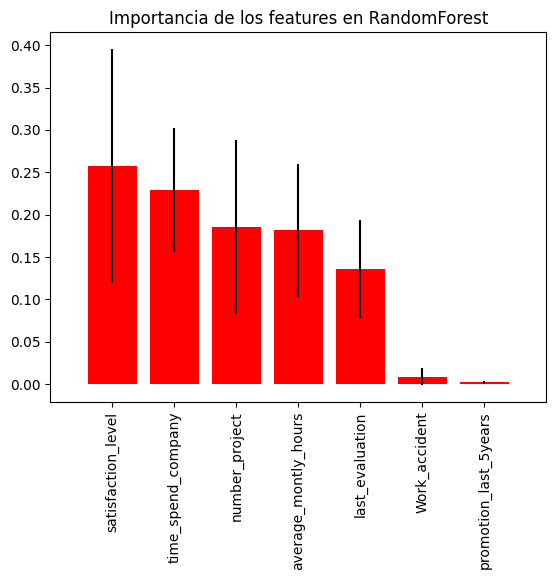

In [14]:
importancias = rf.feature_importances_
print (all(importancias == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)))
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importancias)[::-1]
nombres_features = X.columns

# Graficar la importancia de los features en el random forest
plt.figure()
plt.title("Importancia de los features en RandomForest")
plt.bar(range(X.shape[1]), importancias[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), nombres_features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# 6: Clasificadores Ada Boost y Gradient Boosting



Recordemos: 

* La idea fundamental de los algoritmos basados en la noción de boosting es tratar de combinar muchos clasificadores débiles en un clasificador fuerte. 

* La principal diferencia con los métodos de Bagging es la forma en que se construye el ensamble: Boosting trata de mejorar la performance concentrándose de alguna forma en los casos con mayor error de entrenamiento.

### `AdaBoostClassifier()`
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
La idea central de AdaBoost es construir un ensamble de week learners y, en cada iteración ir incrementando el peso de los casos mal clasificados. La implementación den Scikit-Learn toma los siguientes parámetros:

* `base_estimator`: análogo al caso de `BaggingClassifier()`, el estimador sobre el cual se va a construir el ensamble. Por efecto, son árboles de decisión.
* `n_estimators`: el máximo de iteraciones
* `learning_rate`: el peso que va a tener la predicción de cada árbol en el ensamble final


### `GradientBoostingClassifier()`
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
Se trata de una generalización del algoritmo general de Boosting para cualquier tipo de función de pérdida diferenciable. En cada etapa, se fitea un árbol de decisión pero se realiza sobre los residuos del árbol anterior. Es decir, se busca corregir las estimaciones entrenando nuevos clasificadores sobre los "residuos" (la diferencia entre el valor observado y el valor predico ($y - \hat{y}$)

Los argumentos que toma como input son ya conocidos:

* `learning_rate`: el peso que va a tener la predicción de cada árbol en el ensamble final

* `n_estimators`: el máximo de iteraciones
* `criterion`: define el criterio de impureza para evaluar la calidad de las particiones
* `max_features`: la cantidad de features que extraerá para entrenar cada `base_estimator`. Por default es igual a `sqrt(X.shape[1])`
* `bootstrap` y `bootstrap_features`: controla si tanto los n_samples como las features son extraidos con reposición.
* `max_depth`: la pronfundidad máxima del árbol
* `min_samples_leaf`: el número mínimo de n_samples para constituir una hoja del árbol (nodo terminal)
* `min_samples_split`: el número mínimo de n_samples para realizar un split.

Utilizaremos como punto de partida el mismo código que utilizamos anteriormente:

In [15]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
evaluar_rendimiento(ab, "AdaBoostClassifier")
evaluar_rendimiento(gb, "GradientBoostingClassifier")

Rendimiento de AdaBoostClassifier:	0.903 ± 0.016
Rendimiento de GradientBoostingClassifier:	0.972 ± 0.004
